# Data Analysis and Data Science
## Be curious about the data 

By: FRANCOIS JUSTINE
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>


**Student Name**: FRANCOIS Justine

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [3]:
import pandas as pd
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [4]:
## Define variable with file name
fn = "breast_cancer_metametric.tsv"

In [5]:
## Read ans save data into variable as a dataframe
data = pd.read_csv("breast_cancer_metametric.tsv", delimiter="\t")
data

FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer_metametric.tsv'

## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [7]:
#data.shape
print( len(data)," samples a.k.a patients")
print( len(data.columns)," variables")
print("donc on a 1104 patients et 14 variables pour chaque patient.")

1104  samples a.k.a patients
14  variables
donc on a 1104 patients et 14 variables pour chaque patient.


***
2. How many age groups are considered?

In [6]:
print(len(data.groupby("AGE_GROUP")), " age groups")
print("age groups",data.loc[:,"AGE_GROUP"].unique())
print("il y a 6 groupes d'âge dans cette étude")

6  age groups
age groups [30. 80. 40. 60. 50. nan 90.]
il y a 6 groupes d'âge dans cette étude


***
3. What is the mean overall survival (in month)?

In [16]:
print(data.OS_MONTHS.mean(axis=0), " months")
print("La moyenne de la suivie en mois est de 126,10326086947464.")

126.10326086947464  months
La moyenne de la suivie en mois est de 126,10326086947464.


***
4. What is the highest mutation count?

In [15]:
print(data.MUTATION_COUNT.max(axis=0), " mutations")
print("Le plus grand nombre de mutations qui a été collecté est : 46,0.") 

46.0  mutations
Le plus grand nombre de mutations qui a été collecté est : 46,0.


***
5. How large is the smallest tumor?

In [14]:
print(data.TUMOR_SIZE.min(axis=0), " cm")
print("La plus petite tumeur est de 1,0cm.")

1.0  cm
La plus petite tumeur est de 1,0cm.


***
6. What are the grade considered in the dataset?

In [13]:
print("Grades:",data.loc[:,"GRADE"].unique())
print("Les différents grades considérés sont 1, 2 et 3.")

Grades: [3. 2. 1.]
Les différents grades considérés sont 1, 2 et 3.


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [12]:
print("Median NPI: ",data.NPI.median(axis=0))
print("La médiane de cette étude pour NPI est de 4,046.")

Median NPI:  4.046
La médiane de cette étude pour NPI est de 4,046.


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [11]:
print("chemotherapy",data.loc[:,"CHEMOTHERAPY"].unique())

chemotherapy [1. 0.]


In [71]:
print("hormone_therapy",data.loc[:,"HORMONE_THERAPY"].unique())

hormone_therapy [1. 0.]


In [72]:
print("radio_therapy",data.loc[:,"RADIO_THERAPY"].unique())

radio_therapy [1. 0.]


In [73]:
print("breast_surgery",data.loc[:,"BREAST_SURGERY"].unique())

breast_surgery [0. 1.]


In [46]:
print("Pour chaque variable de traitement (chimiothérapie, hormonothérapie, radiothérapie, chirurgie mammaire), il n'y a que deux possibilités : 1 pour 'oui', indiquant que le patient a reçu le traitement, et 0 pour 'non', indiquant qu'il n'a pas reçu le traitement.")

print("Nombre de patients ayant reçu chaque traitement :")
print("- Chimiothérapie :", sum(data.CHEMOTHERAPY == 1))
print("- Hormonothérapie :", sum(data.HORMONE_THERAPY == 1))
print("- Radiothérapie :", sum(data.RADIO_THERAPY == 1))
print("- Chirurgie mammaire :", sum(data.BREAST_SURGERY == 1))

Pour chaque variable de traitement (chimiothérapie, hormonothérapie, radiothérapie, chirurgie mammaire), il n'y a que deux possibilités : 1 pour 'oui', indiquant que le patient a reçu le traitement, et 0 pour 'non', indiquant qu'il n'a pas reçu le traitement.
Nombre de patients ayant reçu chaque traitement :
- Chimiothérapie : 244
- Hormonothérapie : 677
- Radiothérapie : 734
- Chirurgie mammaire : 468


***
10. How many patients in the dataset have had breast surgery?

In [8]:
print(data.BREAST_SURGERY==1, "patients have had breast surgery")
print(sum(data.BREAST_SURGERY==1), "patients have had breast surgery")
print("ici, 468 patients ont reçu une chirurgie mammaire.")

0       False
1       False
2       False
3       False
4        True
        ...  
1099     True
1100    False
1101    False
1102     True
1103     True
Name: BREAST_SURGERY, Length: 1104, dtype: bool patients have had breast surgery
468 patients have had breast surgery
ici, 468 patients ont reçu une chirurgie mammaire.


## Visualize the data [30 pts pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

Vous vous intéressez d'abord à la distribution de la survie globale des différents échantillons. Vous émettez l'hypothèse que la distribution diffère d'un stade tumoral à l'autre.

Concevez un graphique qui vous aidera à vérifier votre hypothèse. Assurez-vous que votre graphique soit lisible et affiché après votre code.

Interprétez brièvement votre graphique.

In [4]:
### Figure
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")
sns.histplot(data, x="OS_MONTHS", bins=25)
sns.despine()

p = sns.histplot(data, x="OS_MONTHS", bins=25, hue="TUMOR_STAGE", multiple="stack")
p.set_title("Distribution de la Survie Globale en Fonction des Différents Stades Tumoraux")
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

NameError: name 'data' is not defined

In [17]:
### Interpretation

print("Le graphique montre la distribution de la survie globale (en mois) pour les patients, en distinguant les différents stades tumoraux.")
print("On observe que les patients au stade tumoral 4 n'ont pas survécu au-delà de 137,5 mois, suggérant une survie globale limitée à ce stade.")
print("En comparaison, les stades tumoraux inférieurs présentent une distribution de survie globale plus étendue, avec certains patients survivant beaucoup plus longtemps.")
print("Ces observations soutiennent l'hypothèse selon laquelle la distribution de la survie globale diffère significativement entre les stades tumoraux, mettant en lumière l'importance du stade tumoral comme facteur pronostique dans le cancer du sein.")

print("Résumé des principales conclusions :")
print("- Le stade tumoral semble influencer de manière significative la survie globale des patients.")
print("- Les patients au stade tumoral 4 ont une survie globale limitée par rapport aux autres stades tumoraux observés.")

Le graphique montre la distribution de la survie globale (en mois) pour les patients, en distinguant les différents stades tumoraux.
On observe que les patients au stade tumoral 4 n'ont pas survécu au-delà de 137,5 mois, suggérant une survie globale limitée à ce stade.
En comparaison, les stades tumoraux inférieurs présentent une distribution de survie globale plus étendue, avec certains patients survivant beaucoup plus longtemps.
Ces observations soutiennent l'hypothèse selon laquelle la distribution de la survie globale diffère significativement entre les stades tumoraux, mettant en lumière l'importance du stade tumoral comme facteur pronostique dans le cancer du sein.
Résumé des principales conclusions :
- Le stade tumoral semble influencer de manière significative la survie globale des patients.
- Les patients au stade tumoral 4 ont une survie globale limitée par rapport aux autres stades tumoraux observés.


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

Vous vous intéressez maintenant à la relation entre la survie globale et les autres variables mesurées. Étant donné votre connaissance du jeu de données, formulez une hypothèse concernant la survie globale.

Explorez le jeu de données et générez au moins une figure qui valide ou invalide votre hypothèse. Assurez-vous que votre figure soit lisible et affichée après votre code.

Interprétez brièvement votre figure.

In [43]:
### Hypothesis:
print("Je postule que le grade du cancer du sein affecte la survie globale des patients.")
print("Les grades plus élevés (Grade 3) devraient être associés à une survie plus courte par rapport")
print("aux grades inférieurs (Grade 1 et Grade 2).")

Je postule que le grade du cancer du sein affecte la survie globale des patients.
Les grades plus élevés (Grade 3) devraient être associés à une survie plus courte par rapport
aux grades inférieurs (Grade 1 et Grade 2).


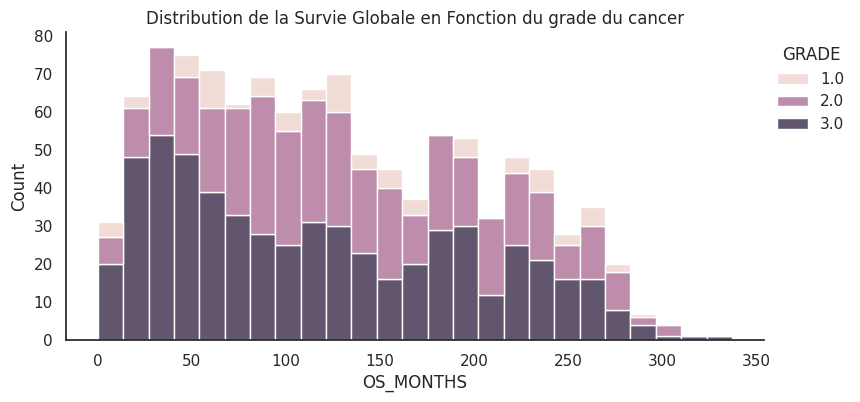

In [58]:
### Figure : 

sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")
p = sns.histplot(data, x="OS_MONTHS", bins=25, hue="GRADE",multiple="stack")
p.set_title("Distribution de la Survie Globale en Fonction du grade du cancer")
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

In [40]:
### Interpretation : 
print("Sachant que 'Grade' indique l'agressivité et la différenciation des cellules cancéreuses,")
print("nous pouvons observer à partir du graphique que la distribution de la survie globale varie significativement")
print("Le graphique montre comment la survie globale varie selon le grade du cancer.")
print("Les patients avec un grade élevé (Grade 3) tendent à avoir des survies plus courtes,")
print("suggérant une agressivité accrue et une survie potentiellement réduite comparée aux grades inférieurs (Grade 1 et 2).")
print("Ces résultats soulignent l'importance du grade du cancer dans l'évaluation du pronostic et du traitement des patients atteints de cancer du sein.")

Sachant que 'Grade' indique l'agressivité et la différenciation des cellules cancéreuses,
nous pouvons observer à partir du graphique que la distribution de la survie globale varie significativement
Le graphique montre comment la survie globale varie selon le grade du cancer.
Les patients avec un grade élevé (Grade 3) tendent à avoir des survies plus courtes,
suggérant une agressivité accrue et une survie potentiellement réduite comparée aux grades inférieurs (Grade 1 et 2).
Ces résultats soulignent l'importance du grade du cancer dans l'évaluation du pronostic et du traitement des patients atteints de cancer du sein.
